# Regressionsanalyse für einen neuen SDR Ansatz für den Inn

In [4]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
from scipy import stats

In [313]:
import scipy

In [358]:
import lmfit

In [359]:
from sklearn import tree

Daten jeweils per csv laden, oder alle erstmal in eine hdf5 (http://www.pytables.org) packen?

In [ ]:
# proper sublots with matplotlib:

# next to each other

#fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
#axes[0].plot('Ticks', 'Open', data = google);
#axes[0].set_title('Original Plot');
#axes[1].plot('Ticks', 'Open', data = one_tenth);
#axes[1].set_title('Sampled Plot');

# overlay in same plot:

#fig = plt.figure();
#ax = fig.add_subplot(111);
#ax.plot(google['Date'], google['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
#ax.plot(google['Date'], google['Open'], color = (1,0,0), label = 'Original');
#ax.set_title('Original and Smoothed Price')
#ax.set_xlabel('Ticks')
#ax.set_ylabel('Price')
#ax.legend(loc='lower right');

![Catchments of all sediment load measurement stations](EZGS_Inn_Karte.png)

*(more at D:\Projekte\Innprojekt\Ergebnisse\Vorträge\Innprojekt Treffen Karlsruhe 04_2016\figures\Sediment)*

In [412]:
passau = pd.read_csv('Passau-Ingling_TagSum.csv', decimal=',', sep=';', header=0, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [434]:
passau_stoffe = pd.read_csv('BY20_Passau_Stoffe.csv', decimal=',', sep=';', header=0, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0)#, parse_dates=True, infer_datetime_format=True)

In [442]:
passau_stoffe_subset

,SedFracht,Cadmium,Chrom,Kupfer,Nickel,Blei,Zink,Phosphor gesamt
Jahr,,,,,,,,
2006,5001711.376,2253.216,61830.712,182750.559,125760.524,73335.820,457332.007,2280.352771
2007,2891563.497,1151.285,36869.816,57964.663,50243.013,39969.592,16175.855,1720.091429
2008,4333513.508,1100.093,42115.557,65708.749,67981.019,30897.629,380125.013,2095.634888
2009,3870148.220,1201.601,50118.230,64759.314,69279.029,24151.682,157217.775,1763.621713
2010,6224991.862,1492.768,61889.691,98645.592,85677.643,44370.177,278909.048,1861.446687
2011,2216659.308,1256.073,71396.823,65555.353,69474.619,27520.594,791496.303,1519.806491
2012,3809658.547,1689.238,135969.093,163883.906,178839.795,76132.494,470223.483,2435.792627
2013,3366337.429,1523.767,68956.541,89526.548,84324.788,40743.566,276482.570,2962.929622


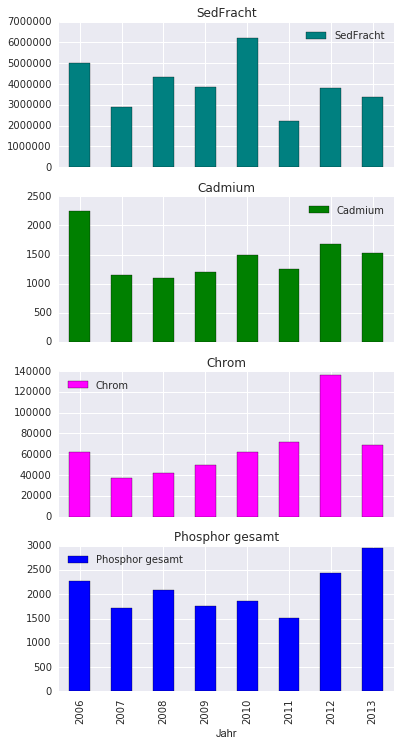

In [479]:
#passau_stoffe_subset.Cadmium.plot.bar()
#plt.figure(figsize=(12,4))
passau_stoffe_subset[['SedFracht', 'Cadmium', 'Chrom', 'Phosphor gesamt']].plot.bar(
    subplots=True, sharex=True, figsize=(6,12), color=('teal', 'green', 'magenta', 'blue'))
plt.savefig('Sed_Cad_Chrom_Phosphor.png')

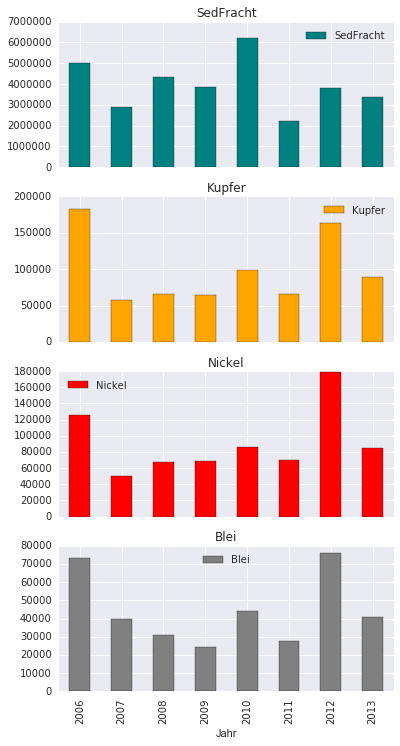

In [475]:
#passau_stoffe_subset.Cadmium.plot.bar()
#plt.figure(figsize=(12,4))
passau_stoffe_subset[['SedFracht', 'Kupfer', 'Nickel', 'Blei']].plot.bar(
    subplots=True, sharex=True, figsize=(6,12), color=('teal', 'orange', 'red', 'grey'))
plt.savefig('Sed_Kupfer_Nickel_Blei.png')

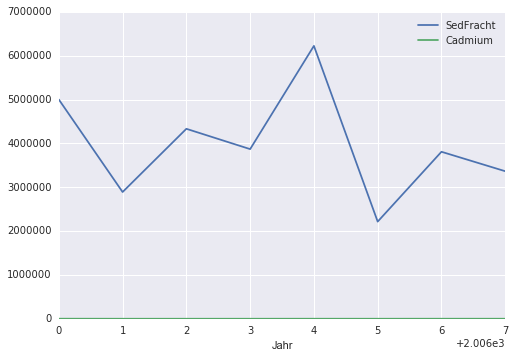

In [452]:
passau_stoffe_subset[['SedFracht', 'Cadmium']].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018484748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A6DFBE0>]], dtype=object)

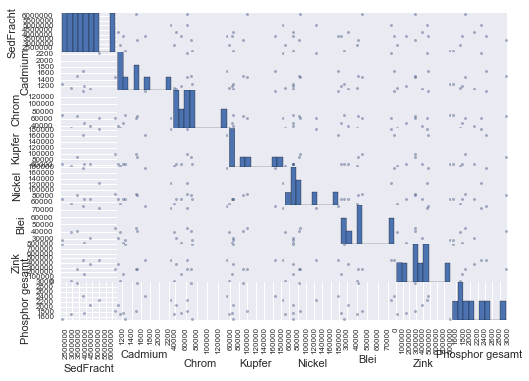

In [455]:
pd.scatter_matrix(passau_stoffe_subset)

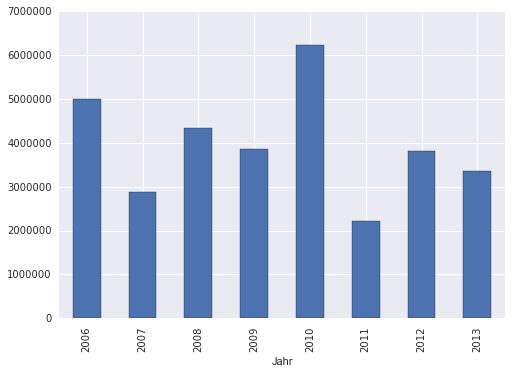

In [448]:
passau_stoffe_subset.SedFracht.plot.bar()

In [437]:
passau_stoffe_subset = passau_stoffe[['SedFracht', 'Cadmium', 'Chrom', 'Kupfer', 'Nickel', 'Blei', 'Zink', 'Phosphor gesamt']]

In [440]:
sns.lmplot(x='SedFracht', y='Cadmium', data=passau_stoffe_subset)

TypeError: 'bool' object is not callable

In [417]:
passau_jahr = passau.groupby(by=passau.index.year).sum()

In [419]:
passau_jahr.to_excel('passau_jahr.xls')

In [420]:
passau_jahr

,Sedfracht
2000,4692807.581
2001,5595742.153
2002,8087801.919
2003,1916180.423
2004,3572580.887
2005,8163935.395
2006,5001711.376
2007,2891563.497
2008,4333513.508
2009,3870148.220


In [2]:
% cd D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\gemessen

D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\gemessen


In [109]:
vent = pd.read_csv('Schwebstoff-Tagesfracht-201350.csv', decimal=',', sep=';', header=29, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [ ]:
vent_series = vent['Sedfracht']

vent_jahr = vent.groupby(by=vent.index.year).sum()

vent_jahr['Anzahl'] = vent.groupby(by=vent.index.year).count()

In [120]:
vent_jahr

,Sedfracht,Anzahl
2008,152567.1,184
2009,146898.1,184
2010,154528.5,184
2011,151119.6,184
2012,199495.1,184
2013,72018.7,184


In [123]:
koessen = pd.read_csv('Schwebstoff-Tagesfracht-202382.csv', decimal=',', sep=';', header=29, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [124]:
koessen_series = koessen['Sedfracht']

koessen_jahr = koessen.groupby(by=koessen.index.year).sum()

koessen_jahr['Anzahl'] = koessen.groupby(by=koessen.index.year).count()

In [125]:
koessen_jahr

,Sedfracht,Anzahl
2008,164824.3,366
2009,265521.2,365
2010,356027.0,365
2011,150142.6,365
2012,253720.5,366
2013,828267.0,365


In [129]:
landeck_br = pd.read_csv('Schwebstoff-Tagesfracht-202036.csv', decimal=',', sep=';', header=30, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [131]:
landeck_br_series = landeck_br['Sedfracht']

landeck_br_jahr = landeck_br.groupby(by=landeck_br.index.year).sum()

landeck_br_jahr['Anzahl'] = landeck_br.groupby(by=landeck_br.index.year).count()

In [132]:
landeck_br_jahr

,Sedfracht,Anzahl
2008,170833.1,366
2009,50897.9,365
2010,378974.1,365
2011,67997.3,365
2012,158676.2,366
2013,168689.6,365


In [134]:
bruckhaeusl = pd.read_csv('Schwebstoff-Tagesfracht-201863.csv', decimal=',', sep=';', header=30, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [136]:
bruckhaeusl_series = bruckhaeusl['Sedfracht']

bruckhaeusl_jahr = bruckhaeusl.groupby(by=bruckhaeusl.index.year).sum()

bruckhaeusl_jahr['Anzahl'] = bruckhaeusl.groupby(by=bruckhaeusl.index.year).count()

In [137]:
bruckhaeusl_jahr

,Sedfracht,Anzahl
2008,71813.2,366
2009,59690.5,365
2010,114665.1,365
2011,47640.2,365
2012,122810.6,366
2013,348501.2,365


In [140]:
innsbr_reichenau = pd.read_csv('Schwebstoff-Tagesfracht-201624.csv', decimal=',', sep=';', header=33, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [142]:
innsbr_reichenau_series = innsbr_reichenau['Sedfracht']

innsbr_reichenau_jahr = innsbr_reichenau.groupby(by=innsbr_reichenau.index.year).sum()

innsbr_reichenau_jahr['Anzahl'] = innsbr_reichenau.groupby(by=innsbr_reichenau.index.year).count()

In [143]:
innsbr_reichenau_jahr

,Sedfracht,Anzahl
2009,133564.3,365
2010,115137.0,365
2011,82394.9,365
2012,378428.9,366
2013,147390.9,365


In [144]:
tumpen = pd.read_csv('Schwebstoff-Tagesfracht-201434.csv', decimal=',', sep=';', header=30, 
                   #encoding = 'ISO-8859-1', 
                   encoding = 'latin-1',
                   #dtype={'Sedfracht':np.float64},
                   index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                   usecols=[0,1], names=['Datum', 'Sedfracht'], 
                   #na_values=['L\xfccke']
                   #na_values=['L\u00fccke    ']
                   na_values='Lücke    '.encode(encoding='latin-1')
                  )

In [145]:
tumpen_series = tumpen['Sedfracht']

tumpen_jahr = tumpen.groupby(by=tumpen.index.year).sum()

tumpen_jahr['Anzahl'] = tumpen.groupby(by=tumpen.index.year).count()

In [146]:
tumpen_jahr

,Sedfracht,Anzahl
2008,635842.6,306
2009,339991.0,365
2010,696082.0,365
2011,652551.7,365
2012,921718.0,366
2013,582111.0,365


In [153]:
vent_q = pd.read_csv('Q-Tagesmittel-201350.csv', header=20, delimiter=';',
                     index_col=0, parse_dates=True, dayfirst=True, infer_datetime_format=True, 
                     usecols=[0,2], names=['Datum', 'Abfluss'], )

In [155]:
vent_q_series = vent_q['Abfluss']

vent_q_jahr = vent_q.groupby(by=vent_q.index.year).mean()

vent_q_jahr['Anzahl'] = vent_q.groupby(by=vent_q.index.year).count()

In [159]:
vent_q_jahr[vent_q_jahr.index == 2008]

,Abfluss,Anzahl
2008,4.730656,366


In [187]:
def gkdby_csv_import(datei):
    import pandas as pd
    daten = pd.read_csv(datei, infer_datetime_format=True, dayfirst=True, delimiter=';', decimal=',', header=9, index_col=0, 
                        names=('Datum', 'dailyMeanConc', 'dailyavgQ', 'Pruefstatus'),
                       usecols=('Datum','dailyMeanConc', 'dailyavgQ'))
    daten.index = pd.to_datetime(daten.index) #, errors=coerce
    #daten['dailyavgQ'] = pd.to_numeric(daten['dailyavgQ'], errors='coerce')
    #daten['dailyMeanConc'] = pd.to_numeric(daten['dailyMeanConc'], errors='coerce')
    daten['dailySedFracht [t]'] = daten['dailyavgQ'] * daten['dailyMeanConc'] * 60 * 60 * 24 / 1000000
    return daten

In [184]:
def SedSumme_tabelle(location_sed):
    summen_tab = pd.DataFrame()
    summen_tab['SedFrachtJahresSumme'] = location_sed.groupby(by=location_sed.index.year).sum()
    summen_tab['SedFrachtCounts'] = pd.value_counts(location_sed.index.year, sort=False)
    print('mean of all years:'+str(location_sed.groupby(by=location_sed.index.year).sum().mean()))
    return summen_tab

In [188]:
linden = gkdby_csv_import('konzentration_18803805.csv')

In [189]:
linden.head()

,dailyMeanConc,dailyavgQ,dailySedFracht [t]
Datum,,,
2012-06-17,31.0,2.1,5.624640
2012-06-18,25.6,1.8,3.981312
2012-06-19,28.7,2.3,5.703264
2012-06-20,27.0,2.3,5.365440
2012-06-21,41.7,5.2,18.734976


In [210]:
linden.max()

dailyMeanConc          973.3000
dailyavgQ              148.0000
dailySedFracht [t]    9626.5152
dtype: float64

In [191]:
SedSumme_tabelle(linden['dailySedFracht [t]'])

mean of all years:12723.6239424


,SedFrachtJahresSumme,SedFrachtCounts
2012,8172.874080,198
2013,31799.552832,365
2014,4968.774144,365
2015,6271.737120,365
2016,12405.181536,270


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B09BA20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AD42A20>], dtype=object)

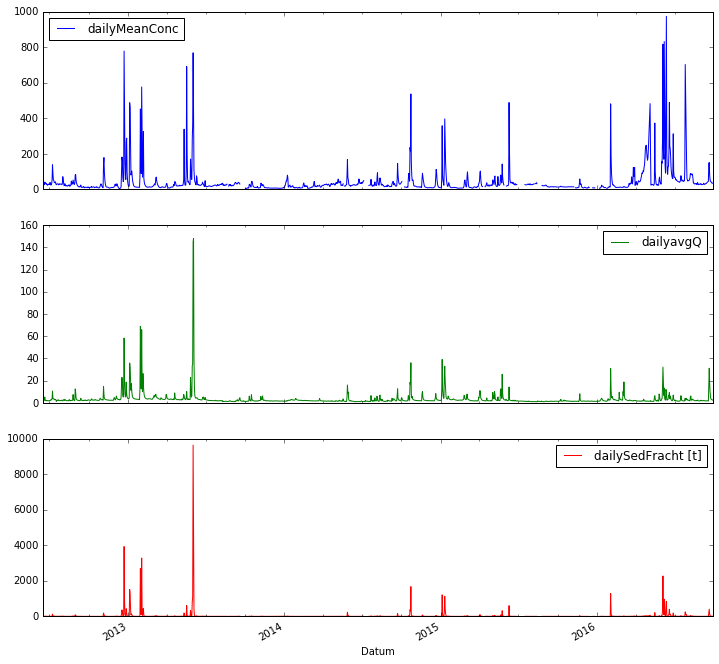

In [209]:
linden.plot(subplots=True, figsize=(12,12))

### PCA/FA/RegrA für

- BI_PREC_jan ... dez (Mean, Sum, Max)
- IM_PREC_s / w / a (Mean, Sum, Max)


- BI_Q_dir_LARSIM_net (Mean, Sum, Max)


- IM_A.... WS (für Seen)


- BI_A_AL Fläche Ackerlands vs Offene/Nat?


- MeanElev, MeanDist2Stream, ElevAbvStream, slope, streampowerindex, TWI, TRI, Sed transport index


---> Im Vergleich zu RUSLE/SED_fracht

[RUSLE-MoRE = ER_mnt_SL + ER_agrl_SL + ER_nat_SL * ER_FCT_corr_FCT_r_ABAG]


In [221]:
ER_nat_SL_spec = 16.5553662479291
BI_A_NAT = 0.961
print(ER_nat_SL_spec * BI_A_NAT * 100 * ER_FCT_corr_FCT_r_ABAG)

1492.1483721973648


In [215]:
ER_mnt_SL = 25225.936883374
ER_nat_SL = 1491.46046738259
ER_agrl_SL_PST = 2553.46772516311
ER_agrl_SL_AL = 0
ER_agrl_SL = ER_agrl_SL_PST + ER_agrl_SL_AL

ER_SDR = 6.55468202201207
ER_FCT_corr_FCT_r_ABAG = 0.937885515773094

In [218]:
ER_E_SED = ER_agrl_SL * ER_SDR / 100 + ER_nat_SL + ER_mnt_SL
print(ER_E_SED)

26884.76904067574


SPI:

https://beaver.nrri.umn.edu/EcolRank/water-quality/
http://www.saga-gis.org/saga_tool_doc/2.3.0/ta_hydrology_21.html

TWI:

http://gis4geomorphology.com/topographic-index-model/
http://www.hydrol-earth-syst-sci.net/10/101/2006/hess-10-101-2006.pdf

TRI:

http://gis4geomorphology.com/roughness-topographic-position/


SedTransIndex:

http://christine-gisrocks.blogspot.de/2012/03/sediment-transport-index.html






In [237]:
sdr_neu_alles = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_alles.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)

In [238]:
sdr_neu_alles

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],Area [m²],IM_A_NAT,IM_A_MNT,IM_A_AL,BI_A_PST,IM_A_AGRL,...,IM_PREC_s [mm/summer],IM_PREC_s _area[mm/summer],elev,dist2stream,elevabvstream,slope,streampowerindex,topowetnessindex,toporoughnessindex,sedtransportindex
0,landeck_2008,landeck_br2_ezg,2008,170833.1,726933125,356.947421,14.123907,0.257898,34.219,34.477,...,17304.362420,23.804614,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
1,vent_2008,vent_pegel_ezg,2008,152567.1,96567500,0.960557,63.064842,0.000000,0.724,0.724,...,2455.566295,25.428496,2887.43,1373.00,390.87,22.49,38.36,3.35,9.44,7.87
2,innsreich_2008,innsreich_ezg,2008,NaN,846703125,344.311337,0.991554,5.369113,111.329,116.698,...,25931.502790,30.626440,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
3,bruckh_2008,bruckh_ezg,2008,71813.2,316188125,118.516326,4.323956,0.376376,55.450,55.827,...,11010.978800,34.824138,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
4,koessen_2008,koessen_ezg,2008,164824.3,734265000,327.762693,8.339129,5.397308,159.672,165.069,...,21536.232970,29.330328,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
5,linden_2008,linden_ezg,2008,NaN,530707500,148.930827,0.000000,273.616772,85.592,359.209,...,10508.450940,19.800834,465.93,1163.43,26.20,3.76,9.54,4.48,1.52,0.58
6,landeck_2009,landeck_br2_ezg,2009,50897.9,726933125,356.947421,14.123907,0.257898,34.219,34.477,...,15297.120320,21.043367,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
7,vent_2009,vent_pegel_ezg,2009,146898.1,96567500,0.960557,63.064842,0.000000,0.724,0.724,...,1969.003359,20.389917,2887.43,1373.00,390.87,22.49,38.36,3.35,9.44,7.87
8,innsreich_2009,innsreich_ezg,2009,133564.3,846703125,344.311337,0.991554,5.369113,111.329,116.698,...,19805.268680,23.391042,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
9,bruckh_2009,bruckh_ezg,2009,59690.5,316188125,118.516326,4.323956,0.376376,55.450,55.827,...,14911.876880,47.161407,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09


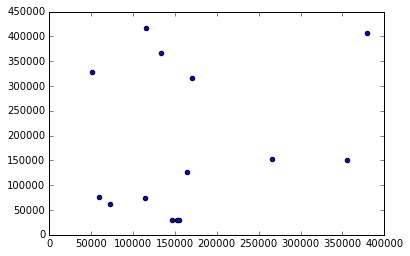

In [241]:
plt.scatter(sdr_neu_alles['SedFracht_gemessen [t/a]'], sdr_neu_alles['ER_gesamt'])

In [244]:
import seaborn as sns

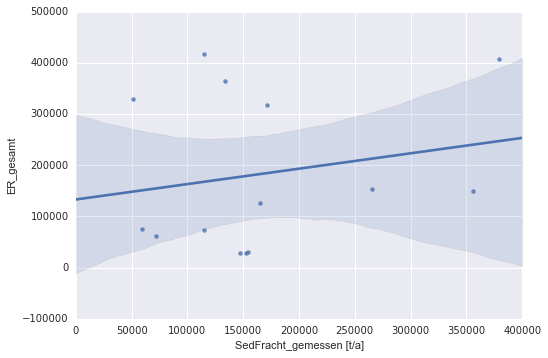

In [245]:
sns.regplot(sdr_neu_alles['SedFracht_gemessen [t/a]'], sdr_neu_alles['ER_gesamt'])

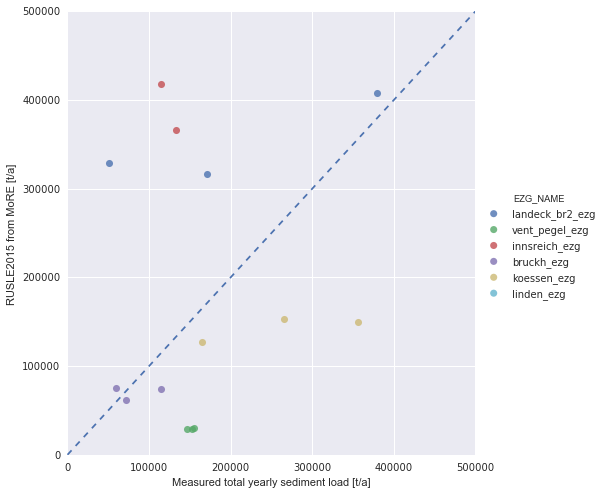

In [258]:
t = sns.lmplot(x='SedFracht_gemessen [t/a]', y='ER_gesamt', data=sdr_neu_alles, 
               hue='EZG_NAME', legend_out=True,size=7, fit_reg=False, scatter_kws={"s": 50})
#sns.jointplot  stat_func=spearmanr, 
#sns.regplot(x='MeanJahresfracht', y='SumRusle', data=rusle_test_t, scatter=False, ax=t.axes[0,0])
#t.annotate(stats.spearmanr)
#t.fig.text(.5, .5, str(spearmanr(scatter_subset['MeanCfaktor'], scatter_subset['t_ha_a'])), ha ='left', fontsize = 15)
plt.plot([0,500000], [0,500000], linestyle='--')
plt.xlim(0,500000)
plt.ylim(0,500000)
plt.ylabel('RUSLE2015 from MoRE [t/a]')
plt.xlabel('Measured total yearly sediment load [t/a]')
plt.savefig('ER_vs_Sed.png')

In [260]:
sdr_neu_alles.columns

Index(['EZG_year', 'EZG_NAME', 'year', 'SedFracht_gemessen [t/a]', 'Area [m²]',
       'IM_A_NAT', 'IM_A_MNT', 'IM_A_AL', 'BI_A_PST', 'IM_A_AGRL', 'IM_A_WS',
       'ER_gesamt', 'ER_nat_SL [t/a]', 'ER_nat_SL_spec [t/a/ha]',
       'ER_mnt_SL [t/a]', 'ER_mnt_SL_spec [t/a/ha]', 'ER_agrl_SL [t/a]',
       'ER_agrl_SL_spec [t/a/ha]', 'BI_Q [m³/s]', 'BI_Q_dir [m³/s]',
       'IM_PREC_yr [mm/a]', 'IM_PREC_yr_area [mm/a/km2]',
       'IM_PREC_s [mm/summer]', 'IM_PREC_s _area[mm/summer]', 'elev',
       'dist2stream', 'elevabvstream', 'slope', 'streampowerindex',
       'topowetnessindex', 'toporoughnessindex', 'sedtransportindex'],
      dtype='object')

In [278]:
sdr_subset = sdr_neu_alles.drop([1,2,5,7,11,13,17])

In [283]:
sdr_subset

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],Area [m²],IM_A_NAT,IM_A_MNT,IM_A_AL,BI_A_PST,IM_A_AGRL,...,IM_PREC_s [mm/summer],IM_PREC_s _area[mm/summer],elev,dist2stream,elevabvstream,slope,streampowerindex,topowetnessindex,toporoughnessindex,sedtransportindex
0,landeck_2008,landeck_br2_ezg,2008,170833.1,726933125,356.947421,14.123907,0.257898,34.219,34.477,...,17304.36242,23.804614,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
3,bruckh_2008,bruckh_ezg,2008,71813.2,316188125,118.516326,4.323956,0.376376,55.450,55.827,...,11010.97880,34.824138,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
4,koessen_2008,koessen_ezg,2008,164824.3,734265000,327.762693,8.339129,5.397308,159.672,165.069,...,21536.23297,29.330328,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
6,landeck_2009,landeck_br2_ezg,2009,50897.9,726933125,356.947421,14.123907,0.257898,34.219,34.477,...,15297.12032,21.043367,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
8,innsreich_2009,innsreich_ezg,2009,133564.3,846703125,344.311337,0.991554,5.369113,111.329,116.698,...,19805.26868,23.391042,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
9,bruckh_2009,bruckh_ezg,2009,59690.5,316188125,118.516326,4.323956,0.376376,55.450,55.827,...,14911.87688,47.161407,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
10,koessen_2009,koessen_ezg,2009,265521.2,734265000,327.762693,8.339129,5.397308,159.672,165.069,...,31007.40090,42.229169,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
12,landeck_2010,landeck_br2_ezg,2010,378974.1,726933125,356.947421,14.123907,0.257898,34.219,34.477,...,21411.50334,29.454571,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
14,innsreich_2010,innsreich_ezg,2010,115137.0,846703125,344.311337,0.991554,5.369113,111.329,116.698,...,26018.26549,30.728912,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
15,bruckh_2010,bruckh_ezg,2010,114665.1,316188125,118.516326,4.323956,0.376376,55.450,55.827,...,10959.24820,34.660531,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09


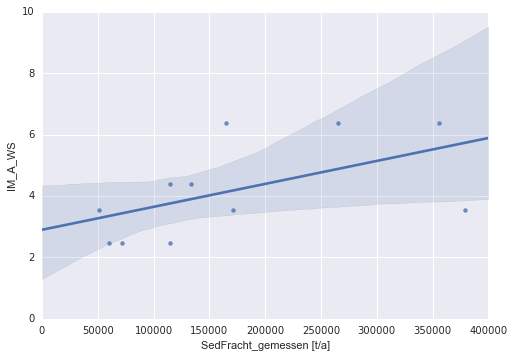

In [287]:
sns.regplot(sdr_subset['SedFracht_gemessen [t/a]'], sdr_subset['IM_A_WS'])

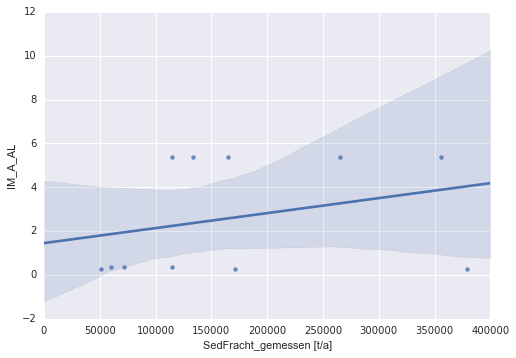

In [286]:
sns.regplot(sdr_subset['SedFracht_gemessen [t/a]'], sdr_subset['IM_A_AL'])

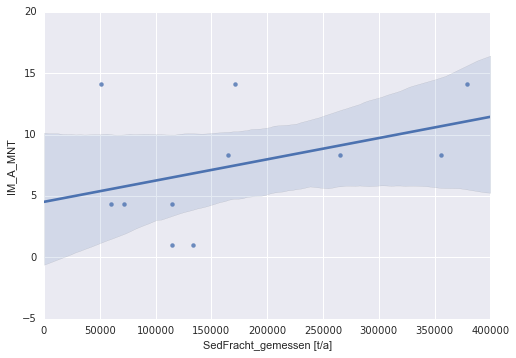

In [285]:
sns.regplot(sdr_subset['SedFracht_gemessen [t/a]'], sdr_subset['IM_A_MNT'])

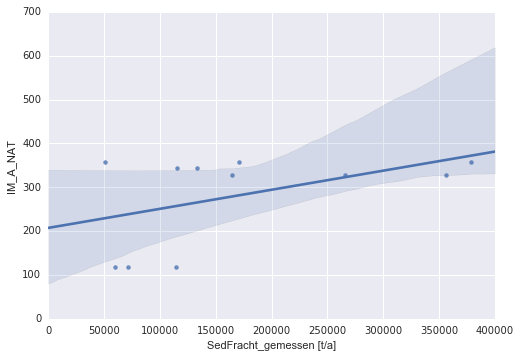

In [284]:
sns.regplot(sdr_subset['SedFracht_gemessen [t/a]'], sdr_subset['IM_A_NAT'])

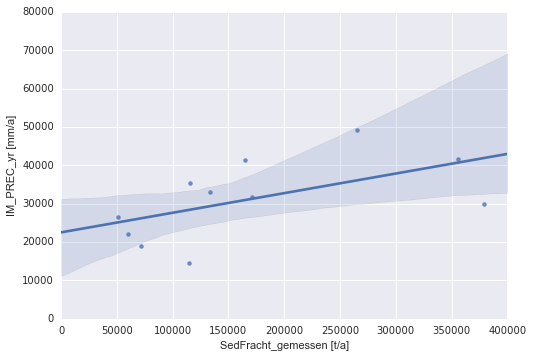

In [280]:
sns.regplot(sdr_subset['SedFracht_gemessen [t/a]'], sdr_subset['IM_PREC_yr [mm/a]'])

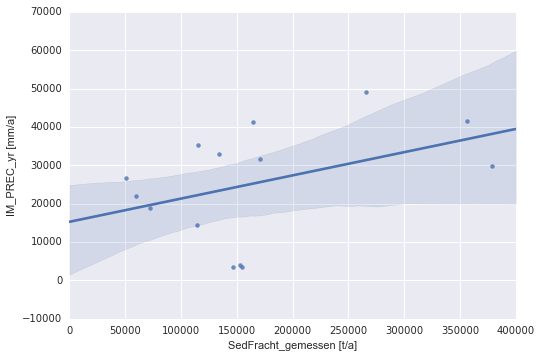

In [276]:
sns.regplot(sdr_neu_alles['SedFracht_gemessen [t/a]'], sdr_neu_alles['IM_PREC_yr [mm/a]'])

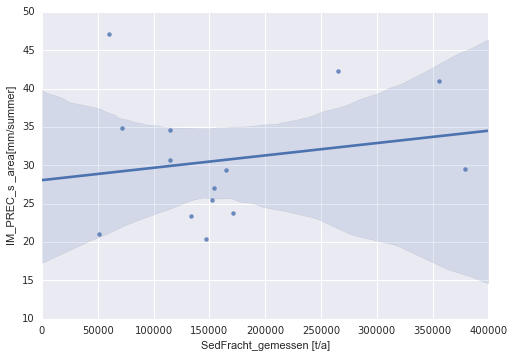

In [266]:
sns.regplot(sdr_neu_alles['SedFracht_gemessen [t/a]'], sdr_neu_alles['IM_PREC_s _area[mm/summer]'])

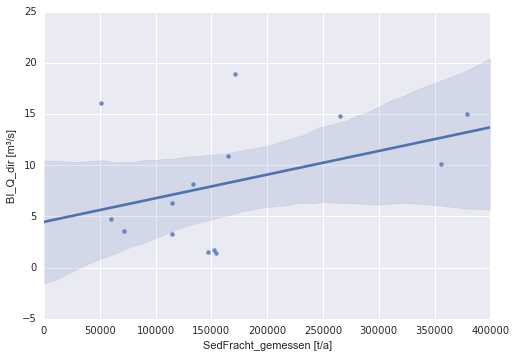

In [267]:
sns.regplot(sdr_neu_alles['SedFracht_gemessen [t/a]'], sdr_neu_alles['BI_Q_dir [m³/s]'])

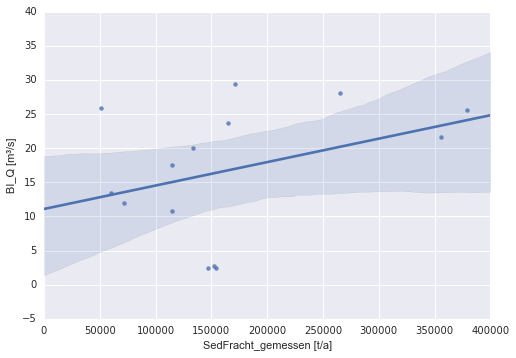

In [268]:
sns.regplot(sdr_neu_alles['SedFracht_gemessen [t/a]'], sdr_neu_alles['BI_Q [m³/s]'])

In [ ]:
zonalstat_areas = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_areas.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)
zonalstat_areas.drop([1,2,5,7,11,13,17], inplace=True)

zonalstat_dgm = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_dgm.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)
zonalstat_dgm.drop([1,2,5,7,11,13,17], inplace=True)

In [308]:
zonalstat_er_more = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_er_more.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)
zonalstat_er_more.drop([1,2,5,7,11,13,17], inplace=True)

In [292]:
zonalstat_wasser = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_wasser.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)
zonalstat_wasser.drop([1,2,5,7,11,13,17], inplace=True)

In [293]:
zonalstat_areas

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],Area [m²],IM_A_NAT,IM_A_NAT_Anteil,IM_A_MNT,IM_A_MNT_Anteil,IM_A_AL,IM_A_AL_Anteil,BI_A_PST,BI_A_PST_Anteil,IM_A_AGRL,IM_A_AGRL_Anteil,IM_A_WS,IM_A_WS_Anteil
0,landeck_2008,landeck_br2_ezg,2008,170833.1,726933125,356.947421,0.491032,14.123907,0.0194,0.257898,0.000355,34.219,0.0471,34.477,0.047,3.548219,0.005
3,bruckh_2008,bruckh_ezg,2008,71813.2,316188125,118.516326,0.374829,4.323956,0.0137,0.376376,0.001190,55.450,0.1754,55.827,0.177,2.470029,0.008
4,koessen_2008,koessen_ezg,2008,164824.3,734265000,327.762693,0.446382,8.339129,0.0114,5.397308,0.007351,159.672,0.2175,165.069,0.225,6.367052,0.009
6,landeck_2009,landeck_br2_ezg,2009,50897.9,726933125,356.947421,0.491032,14.123907,0.0194,0.257898,0.000355,34.219,0.0471,34.477,0.047,3.548219,0.005
8,innsreich_2009,innsreich_ezg,2009,133564.3,846703125,344.311337,0.406649,0.991554,0.0012,5.369113,0.006341,111.329,0.1315,116.698,0.138,4.401518,0.005
9,bruckh_2009,bruckh_ezg,2009,59690.5,316188125,118.516326,0.374829,4.323956,0.0137,0.376376,0.001190,55.450,0.1754,55.827,0.177,2.470029,0.008
10,koessen_2009,koessen_ezg,2009,265521.2,734265000,327.762693,0.446382,8.339129,0.0114,5.397308,0.007351,159.672,0.2175,165.069,0.225,6.367052,0.009
12,landeck_2010,landeck_br2_ezg,2010,378974.1,726933125,356.947421,0.491032,14.123907,0.0194,0.257898,0.000355,34.219,0.0471,34.477,0.047,3.548219,0.005
14,innsreich_2010,innsreich_ezg,2010,115137.0,846703125,344.311337,0.406649,0.991554,0.0012,5.369113,0.006341,111.329,0.1315,116.698,0.138,4.401518,0.005
15,bruckh_2010,bruckh_ezg,2010,114665.1,316188125,118.516326,0.374829,4.323956,0.0137,0.376376,0.001190,55.450,0.1754,55.827,0.177,2.470029,0.008


In [294]:
zonalstat_dgm

,EZG_year,EZG_NAME,year,elev,dist2stream,elevabvstream,slope,streampowerindex,topowetnessindex,toporoughnessindex,sedtransportindex
0,landeck_2008,landeck_br2_ezg,2008,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
3,bruckh_2008,bruckh_ezg,2008,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
4,koessen_2008,koessen_ezg,2008,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
6,landeck_2009,landeck_br2_ezg,2009,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
8,innsreich_2009,innsreich_ezg,2009,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
9,bruckh_2009,bruckh_ezg,2009,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
10,koessen_2009,koessen_ezg,2009,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
12,landeck_2010,landeck_br2_ezg,2010,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
14,innsreich_2010,innsreich_ezg,2010,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
15,bruckh_2010,bruckh_ezg,2010,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09


In [309]:
zonalstat_er_more

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],ER_gesamt,SDR_realworld,ER_nat_SL [t/a],ER_nat_SL_spec [t/a/ha],ER_mnt_SL [t/a],ER_mnt_SL_spec [t/a/ha],ER_agrl_SL [t/a],ER_agrl_SL_spec [t/a/ha]
0,landeck_2008,landeck_br2_ezg,2008,170833.1,317026.88,0.539,271810.79,7.61,5649.56,4.0,39566.53,11.48
3,bruckh_2008,bruckh_ezg,2008,71813.2,62259.94,1.153,21505.89,1.81,1729.58,4.0,39024.48,6.99
4,koessen_2008,koessen_ezg,2008,164824.3,126776.51,1.300,41910.41,1.28,3335.65,4.0,81530.45,4.94
6,landeck_2009,landeck_br2_ezg,2009,50897.9,329038.61,0.155,281388.33,7.88,5649.56,4.0,42000.71,12.18
8,innsreich_2009,innsreich_ezg,2009,133564.3,365746.21,0.365,198560.14,5.77,396.62,4.0,166789.45,14.29
9,bruckh_2009,bruckh_ezg,2009,59690.5,75337.39,0.792,26303.51,2.22,1729.58,4.0,47304.29,8.47
10,koessen_2009,koessen_ezg,2009,265521.2,152834.52,1.737,49451.73,1.51,3335.65,4.0,100047.13,6.06
12,landeck_2010,landeck_br2_ezg,2010,378974.1,407454.41,0.930,350774.19,9.83,5649.56,4.0,51030.66,14.80
14,innsreich_2010,innsreich_ezg,2010,115137.0,417833.11,0.276,228805.64,6.65,396.62,4.0,188630.86,16.16
15,bruckh_2010,bruckh_ezg,2010,114665.1,74343.62,1.542,25946.94,2.19,1729.58,4.0,46667.10,8.36


In [296]:
zonalstat_wasser

,EZG_year,EZG_NAME,year,BI_Q [m³/s],BI_Q_dir [m³/s],IM_PREC_yr [mm/a],IM_PREC_yr_area [mm/a/km2],IM_PREC_s [mm/summer],IM_PREC_s _area[mm/summer]
0,landeck_2008,landeck_br2_ezg,2008,29.413885,18.892000,31661.93908,43.555505,17304.36242,23.804614
3,bruckh_2008,bruckh_ezg,2008,11.902167,3.626768,18835.80132,59.571501,11010.97880,34.824138
4,koessen_2008,koessen_ezg,2008,23.690911,10.869262,41390.84165,56.370441,21536.23297,29.330328
6,landeck_2009,landeck_br2_ezg,2009,25.939382,16.079380,26607.85176,36.602888,15297.12032,21.043367
8,innsreich_2009,innsreich_ezg,2009,19.967390,8.178742,33020.27666,38.998647,19805.26868,23.391042
9,bruckh_2009,bruckh_ezg,2009,13.511204,4.748510,22066.12130,69.787951,14911.87688,47.161407
10,koessen_2009,koessen_ezg,2009,28.033451,14.793651,49151.74136,66.940058,31007.40090,42.229169
12,landeck_2010,landeck_br2_ezg,2010,25.653623,14.996704,29803.28552,40.998662,21411.50334,29.454571
14,innsreich_2010,innsreich_ezg,2010,17.562410,6.361864,35351.23930,41.751634,26018.26549,30.728912
15,bruckh_2010,bruckh_ezg,2010,10.731153,3.280241,14506.82636,45.880364,10959.24820,34.660531


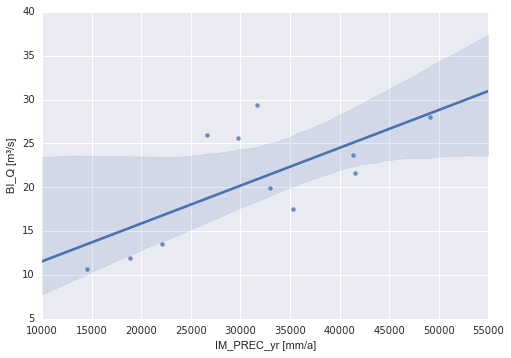

In [300]:
sns.regplot(zonalstat_wasser['IM_PREC_yr [mm/a]'], zonalstat_wasser['BI_Q [m³/s]'])

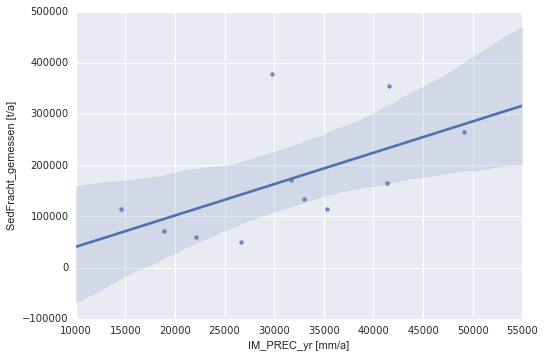

In [304]:
sns.regplot(zonalstat_wasser['IM_PREC_yr [mm/a]'], zonalstat_areas['SedFracht_gemessen [t/a]'])

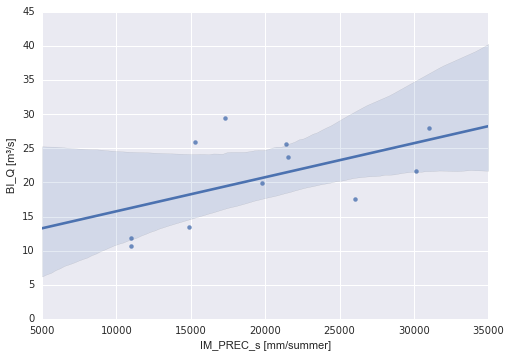

In [303]:
sns.regplot(zonalstat_wasser['IM_PREC_s [mm/summer]'], zonalstat_wasser['BI_Q [m³/s]'])

In [305]:
SDR_perfect = zonalstat_areas['SedFracht_gemessen [t/a]'] / zonalstat_er_more['ER_gesamt']

In [306]:
SDR_perfect

0     0.538860
3     1.153442
4     1.300117
6     0.154687
8     0.365183
9     0.792309
10    1.737312
12    0.930102
14    0.275557
15    1.542366
16    2.376542
dtype: float64

In [341]:
linregress_elev = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['elev'])
print('slope:', linregress_elev.slope)
print('intercept:', linregress_elev.intercept)
print('r_value:', linregress_elev.rvalue)
print('r-squared:', linregress_elev.rvalue**2)
print('p_value:', linregress_elev.pvalue)
print('std_err:', linregress_elev.stderr)

slope: -0.000170386759961
intercept: 1640.56445191
r_value: -0.0469468187671
r-squared: 0.00220400379235
p_value: 0.890978560962
std_err: 0.00120845170716


In [344]:
pearsons_elev = scipy.stats.pearsonr(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['elev'])

print(pearsons_elev)

(-0.046946818767100003, 0.89097856096218375)


In [345]:
spearman_elev = scipy.stats.spearmanr(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['elev'])

print(spearman_elev)

SpearmanrResult(correlation=-0.15463842820677165, pvalue=0.64983507494718573)


In [347]:
distance_elev = scipy.spatial.distance.correlation(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['elev'])

print(distance_elev)

1.04694681877


In [340]:
linregress_dist2stream = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['dist2stream'])
print('slope:', linregress_dist2stream.slope)
print('intercept:', linregress_dist2stream.intercept)
print('r_value:', linregress_dist2stream.rvalue)
print('r-squared:', linregress_dist2stream.rvalue**2)
print('p_value:', linregress_dist2stream.pvalue)
print('std_err:', linregress_dist2stream.stderr)

slope: 4.62580788819e-05
intercept: 1226.90951953
r_value: 0.239672635813
r-squared: 0.0574429723576
p_value: 0.477809588521
std_err: 6.24599602479e-05


In [339]:
linregress_elevabvstream = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['elevabvstream'])
print('slope:', linregress_elevabvstream.slope)
print('intercept:', linregress_elevabvstream.intercept)
print('r_value:', linregress_elevabvstream.rvalue)
print('r-squared:', linregress_elevabvstream.rvalue**2)
print('p_value:', linregress_elevabvstream.pvalue)
print('std_err:', linregress_elevabvstream.stderr)

slope: -0.000130665413716
intercept: 389.027770438
r_value: -0.199827685315
r-squared: 0.0399311038184
p_value: 0.555793257024
std_err: 0.00021356738759


In [336]:
linregress_slope = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['slope'])
print('slope:', linregress_slope.slope)
print('intercept:', linregress_slope.intercept)
print('r_value:', linregress_slope.rvalue)
print('r-squared:', linregress_slope.rvalue**2)
print('p_value:', linregress_slope.pvalue)
print('std_err:', linregress_slope.stderr)

slope: -1.92070133903e-06
intercept: 23.4222417698
r_value: -0.0685740495877
r-squared: 0.00470240027686
p_value: 0.84121805291
std_err: 9.31440817539e-06


In [335]:
linregress_streampowerindex = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['streampowerindex'])
print('slope:', linregress_streampowerindex.slope)
print('intercept:', linregress_streampowerindex.intercept)
print('r_value:', linregress_streampowerindex.rvalue)
print('r-squared:', linregress_streampowerindex.rvalue**2)
print('p_value:', linregress_streampowerindex.pvalue)
print('std_err:', linregress_streampowerindex.stderr)

slope: 1.70783299177e-06
intercept: 62.9114497845
r_value: 0.0086597239372
r-squared: 7.49908186685e-05
p_value: 0.979840112696
std_err: 6.57360814677e-05


In [334]:
linregress_topowetnessindex = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['topowetnessindex'])
print('slope:', linregress_topowetnessindex.slope)
print('intercept:', linregress_topowetnessindex.intercept)
print('r_value:', linregress_topowetnessindex.rvalue)
print('r-squared:', linregress_topowetnessindex.rvalue**2)
print('p_value:', linregress_topowetnessindex.pvalue)
print('std_err:', linregress_topowetnessindex.stderr)

slope: -1.72083231643e-07
intercept: 3.26671378564
r_value: -0.116784088779
r-squared: 0.0136385233918
p_value: 0.732384474433
std_err: 4.87811094202e-07


In [332]:
linregress_toporoughnessindex = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['toporoughnessindex'])
print('slope:', linregress_toporoughnessindex.slope)
print('intercept:', linregress_toporoughnessindex.intercept)
print('r_value:', linregress_toporoughnessindex.rvalue)
print('r-squared:', linregress_toporoughnessindex.rvalue**2)
print('p_value:', linregress_toporoughnessindex.pvalue)
print('std_err:', linregress_toporoughnessindex.stderr)

slope: -6.04201333151e-07
intercept: 9.8670068463
r_value: -0.0441168595594
r-squared: 0.00194629729739
p_value: 0.897519599344
std_err: 4.56071348606e-06


In [333]:
linregress_sedtransportindex = scipy.stats.linregress(zonalstat_areas['SedFracht_gemessen [t/a]'], 
                                                                     zonalstat_dgm['sedtransportindex'])
print('slope:', linregress_sedtransportindex.slope)
print('intercept:', linregress_sedtransportindex.intercept)
print('r_value:', linregress_sedtransportindex.rvalue)
print('r-squared:', linregress_sedtransportindex.rvalue**2)
print('p_value:', linregress_sedtransportindex.pvalue)
print('std_err:', linregress_sedtransportindex.stderr)

slope: -1.96709411715e-06
intercept: 8.1129062045
r_value: -0.164864520894
r-squared: 0.0271803102495
p_value: 0.628086821613
std_err: 3.92277009712e-06


In [348]:
sdr_basic = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_sdr_basic_subset.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)

In [349]:
sdr_basic

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],ER_gesamt,SDR_realworld,IM_A_MNT_Anteil,IM_A_NAT_Anteil,IM_A_AGRL_Anteil,IM_PREC_yr [mm/a],BI_Q_dir [m³/s],toporoughnessindex,slope
0,landeck_2008,landeck_br2_ezg,2008,170833.1,317026.88,0.539,0.019429,0.491032,0.047428,31661.93908,18.892268,11.467255,26.627967
1,bruckh_2008,bruckh_ezg,2008,71813.2,62259.94,1.153,0.013675,0.374829,0.176562,18835.80132,3.626768,8.548645,20.816681
2,koessen_2008,koessen_ezg,2008,164824.3,126776.51,1.300,0.011357,0.446382,0.224808,41390.84165,10.869262,8.263672,19.841515
3,landeck_2009,landeck_br2_ezg,2009,50897.9,329038.61,0.155,0.019429,0.491032,0.047428,26607.85176,16.079380,11.467255,26.627967
4,innsreich_2009,innsreich_ezg,2009,133564.3,365746.21,0.365,0.001171,0.406649,0.137826,33020.27666,8.178742,11.284750,26.084484
5,bruckh_2009,bruckh_ezg,2009,59690.5,75337.39,0.792,0.013675,0.374829,0.176562,22066.12130,4.748510,8.548645,20.816681
6,koessen_2009,koessen_ezg,2009,265521.2,152834.52,1.737,0.011357,0.446382,0.224808,49151.74136,14.793651,8.263672,19.841515
7,landeck_2010,landeck_br2_ezg,2010,378974.1,407454.41,0.930,0.019429,0.491032,0.047428,29803.28552,14.996704,11.467255,26.627967
8,innsreich_2010,innsreich_ezg,2010,115137.0,417833.11,0.276,0.001171,0.406649,0.137826,35351.23930,6.361864,11.284750,26.084484
9,bruckh_2010,bruckh_ezg,2010,114665.1,74343.62,1.542,0.013675,0.374829,0.176562,14506.82636,3.280241,8.548645,20.816681


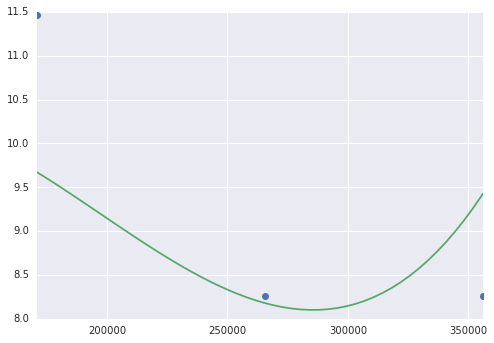

In [356]:
x = sdr_basic['SedFracht_gemessen [t/a]'].values
y = sdr_basic['toporoughnessindex'].values

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [365]:
sdr_test_features = ['IM_A_NAT_Anteil', 'IM_PREC_yr [mm/a]', 'BI_Q_dir [m³/s]', 'toporoughnessindex']

In [367]:
from sklearn.tree import DecisionTreeRegressor

In [368]:
y = sdr_basic['SDR_realworld']
X = sdr_basic[sdr_test_features]

rt = DecisionTreeRegressor()
rt.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [408]:
def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("rt3.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "rt3.dot", "-o", "rt3.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [379]:
visualize_tree(rt, sdr_test_features)

In [404]:
sdr_ohneER_subset = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_ohneER_subset.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)
sdr_ohneER_subset

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],ER_gesamt,SDR_realworld,Area [m²],IM_A_NAT,IM_A_NAT_Anteil,IM_A_MNT,...,IM_PREC_yr [mm/a],IM_PREC_s [mm/summer],elev,dist2stream,elevabvstream,slope,streampowerindex,topowetnessindex,toporoughnessindex,sedtransportindex
0,landeck_2008,landeck_br2_ezg,2008,170833.1,317026.88220,0.538860,726933125,356.947421,0.491032,14.123907,...,31661.93908,17304.36242,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
1,bruckh_2008,bruckh_ezg,2008,71813.2,62259.94383,1.153441,316188125,118.516326,0.374829,4.323956,...,18835.80132,11010.97880,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
2,koessen_2008,koessen_ezg,2008,164824.3,126776.51100,1.300117,734265000,327.762693,0.446382,8.339129,...,41390.84165,21536.23297,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
3,landeck_2009,landeck_br2_ezg,2009,50897.9,329038.61050,0.154687,726933125,356.947421,0.491032,14.123907,...,26607.85176,15297.12032,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
4,innsreich_2009,innsreich_ezg,2009,133564.3,365746.20840,0.365183,846703125,344.311337,0.406649,0.991554,...,33020.27666,19805.26868,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
5,bruckh_2009,bruckh_ezg,2009,59690.5,75337.38618,0.792309,316188125,118.516326,0.374829,4.323956,...,22066.12130,14911.87688,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
6,koessen_2009,koessen_ezg,2009,265521.2,152834.51620,1.737312,734265000,327.762693,0.446382,8.339129,...,49151.74136,31007.40090,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
7,landeck_2010,landeck_br2_ezg,2010,378974.1,407454.41090,0.930102,726933125,356.947421,0.491032,14.123907,...,29803.28552,21411.50334,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
8,innsreich_2010,innsreich_ezg,2010,115137.0,417833.11220,0.275557,846703125,344.311337,0.406649,0.991554,...,35351.23930,26018.26549,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
9,bruckh_2010,bruckh_ezg,2010,114665.1,74343.61901,1.542366,316188125,118.516326,0.374829,4.323956,...,14506.82636,10959.24820,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09


In [407]:
print(sdr_ohneER_subset.ix[:,6:].columns)

Index(['Area [m²]', 'IM_A_NAT', 'IM_A_NAT_Anteil', 'IM_A_MNT',
       'IM_A_MNT_Anteil', 'IM_A_AL', 'IM_A_AL_Anteil', 'BI_A_PST',
       'BI_A_PST_Anteil', 'IM_A_AGRL', 'IM_A_AGRL_Anteil', 'IM_A_WS',
       'IM_A_WS_Anteil', 'BI_Q [m³/s]', 'BI_Q_dir [m³/s]', 'IM_PREC_yr [mm/a]',
       'IM_PREC_s [mm/summer]', 'elev', 'dist2stream', 'elevabvstream',
       'slope', 'streampowerindex', 'topowetnessindex', 'toporoughnessindex',
       'sedtransportindex'],
      dtype='object')


In [409]:
y_fastalles = sdr_ohneER_subset['SDR_realworld']
X_fastalles = sdr_ohneER_subset.ix[:,6:]

rt3 = DecisionTreeRegressor()
rt3.fit(X_fastalles, y_fastalles)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [410]:
visualize_tree(rt3, sdr_ohneER_subset.ix[:,6:].columns)

In [401]:
export_graphviz(rt2, out_file=t,
                        feature_names=sdr_alles_subset.ix[:,5:].columns)

NameError: name 'export_graphviz' is not defined